In [1]:
import torch
import torchvision
from torch import nn
from torchvision import datasets, models, transforms

from PIL import Image
import numpy as np
import glob
import matplotlib.pyplot as plt
import os
import random

import image_utils

from sklearn.metrics.pairwise import pairwise_distances
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [2]:
filelist = glob.glob('./test_images/dresses_sample/*.jpg')
filelist = sorted(filelist)
filenames = [os.path.basename(f).split('.jpg')[0] for f in filelist]

In [3]:
def load_features(path, filenames):
    features = np.array([np.load(os.path.join(path, f + '.npy')) for f in filenames])
    features = StandardScaler().fit_transform(features)
    return(features)

In [4]:
def concat_features(feat1, feat2):
    feat_concat = np.concatenate([feat1, feat2], axis=1)
    feat_concat = StandardScaler().fit_transform(feat_concat)
    return feat_concat

In [5]:
f_path = './test_features/dresses_sample/'
f_dirs = [f_dir for f_dir in os.listdir(f_path) if os.path.isdir(os.path.join(f_path, f_dir))]
f_dirs = sorted(f_dirs)

feat_dict = {}
for f_dir in f_dirs:
    feat_dict[f_dir] = load_features(os.path.join(f_path, f_dir), filenames)

/Users/sonynka/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [6]:
f_dirs

['akiwi_114',
 'akiwi_50',
 'akiwi_64',
 'resnet_orig',
 'resnet_pca128',
 'resnet_retrained']

In [7]:
feat_dict['resnet_orig_50'] = concat_features(feat_dict['resnet_orig'], feat_dict['akiwi_50']*2)
feat_dict['resnet_retrain_50'] = concat_features(feat_dict['resnet_retrained'], feat_dict['akiwi_50']*2)

In [8]:
def get_similar_imgs(img_path, img_files, features, title='', num_imgs=8):
    
    fig, axarr = plt.subplots(1, num_imgs, figsize=(num_imgs*2, 2))
    
    img_file_idx = img_files.index(img_path)
    img_feature = features[img_file_idx]
    
    dist = pairwise_distances(img_feature.reshape(1, -1), features)
    img_idxs = np.argsort(dist)[0].tolist()[:num_imgs]
    
    feat_dim = features.shape[1]

    for i, img_idx in enumerate(img_idxs):
        img = Image.open(img_files[img_idx])
        ax = axarr[i]
        ax.set_xlabel(round(dist[0][img_idx] / feat_dim * 100, 2))
        ax.set_xticks([])
        ax.set_yticks([])
        ax.imshow(img)
    
    fig.suptitle(title)
    plt.show()

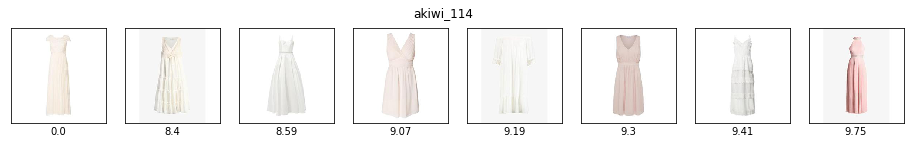

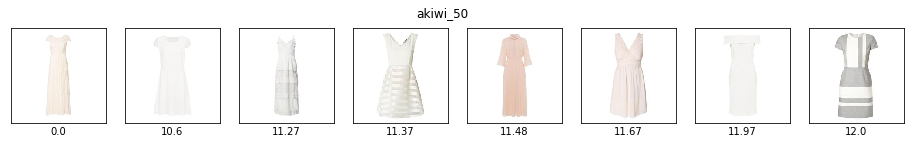

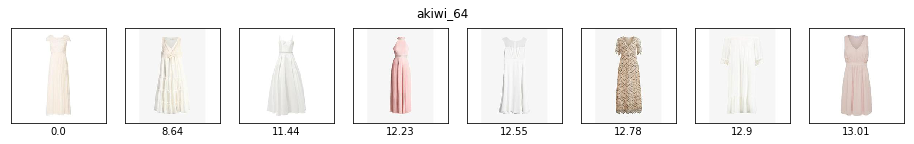

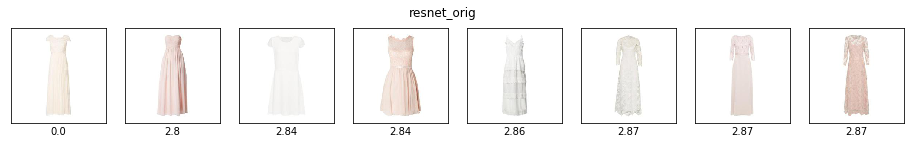

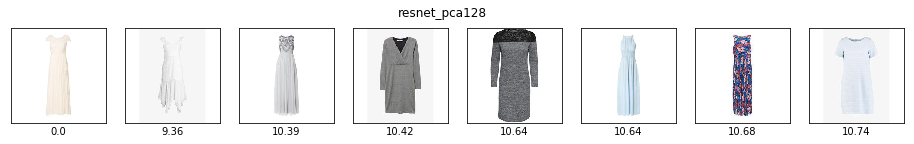

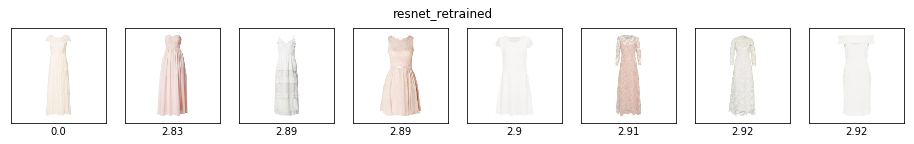

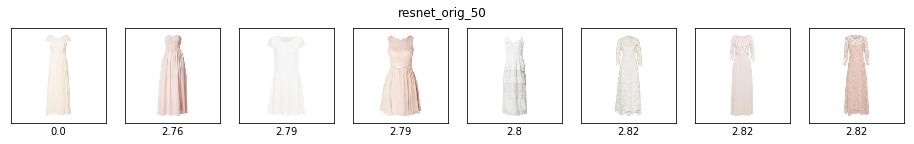

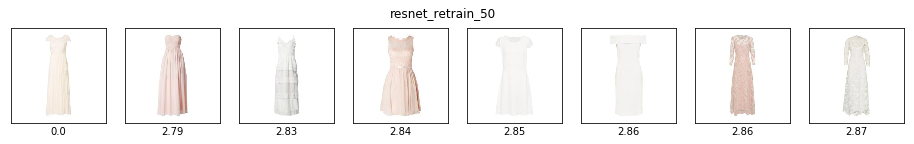

In [11]:
img_path = './test_images/dresses_sample/9817815.jpg'
for key, features in feat_dict.items():
    get_similar_imgs(img_path, filelist, features, title=key)

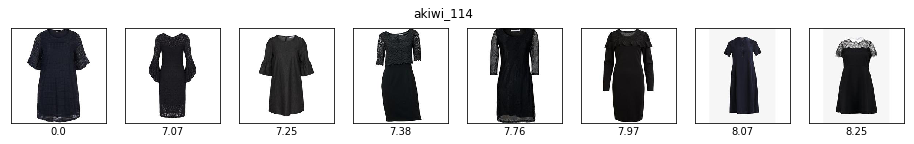

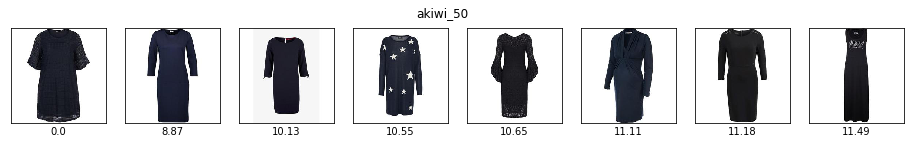

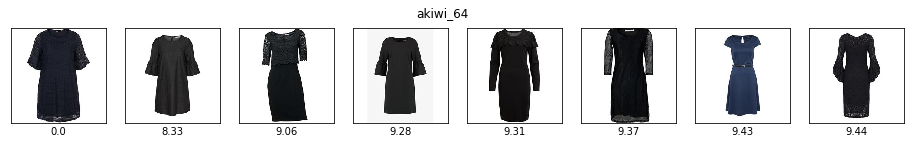

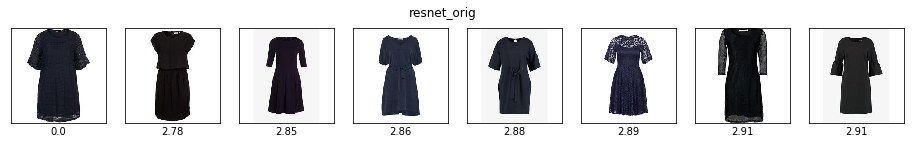

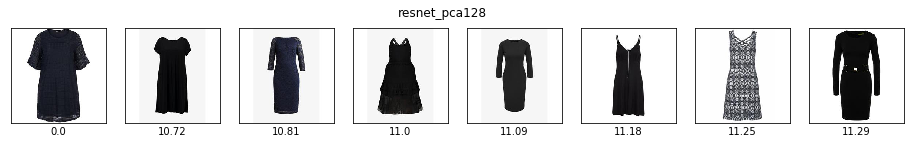

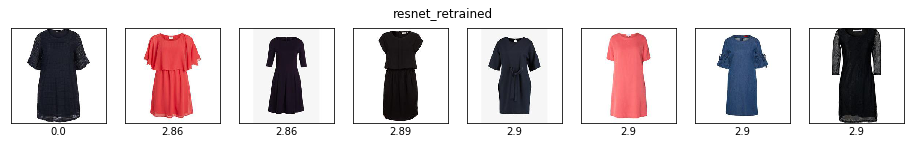

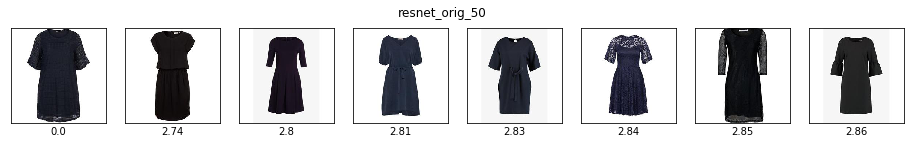

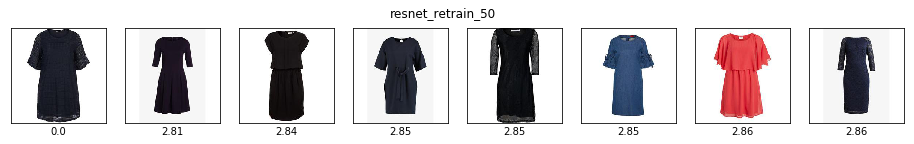

In [10]:
img_path = './test_images/dresses_sample/639325855.jpg'
for key, features in feat_dict.items():
    get_similar_imgs(img_path, filelist, features, title=key)

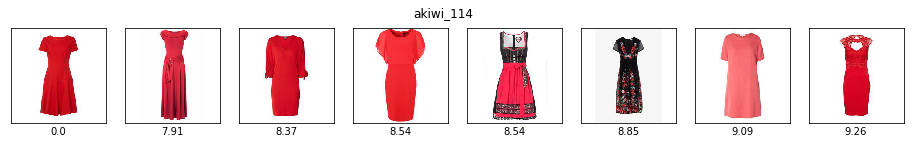

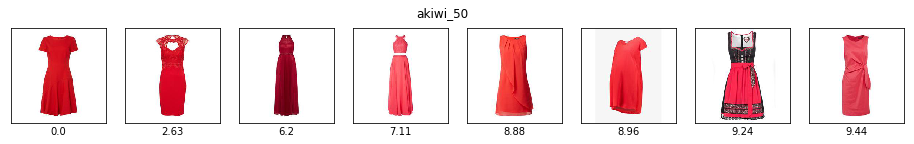

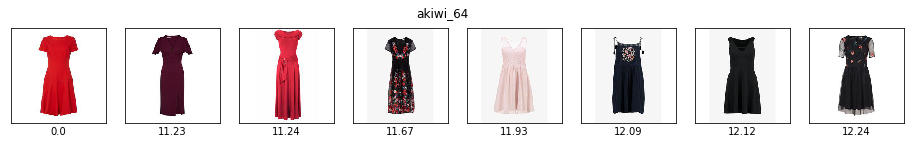

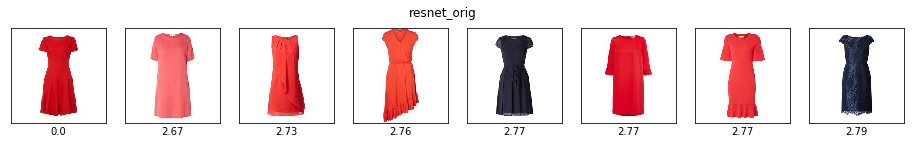

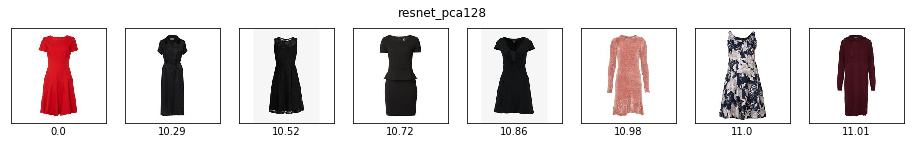

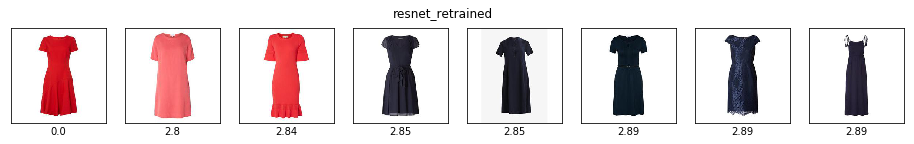

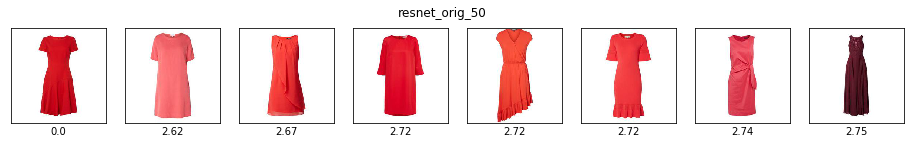

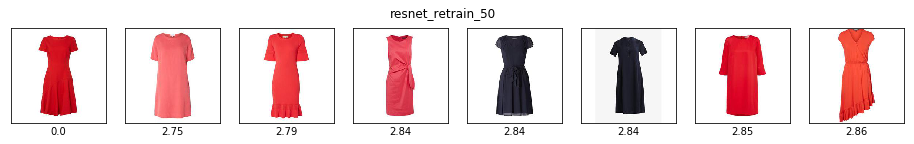

In [14]:
img_path = './test_images/dresses_sample/9810193.jpg'
for key, features in feat_dict.items():
    get_similar_imgs(img_path, filelist, features, title=key)

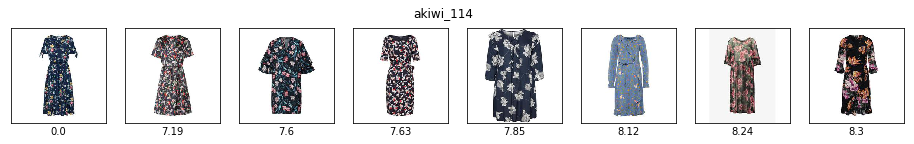

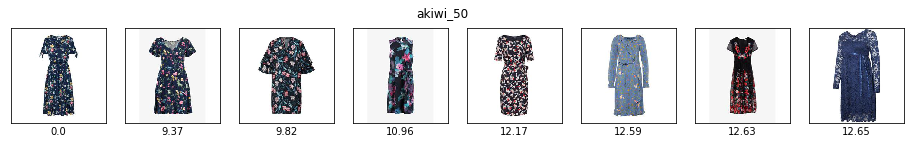

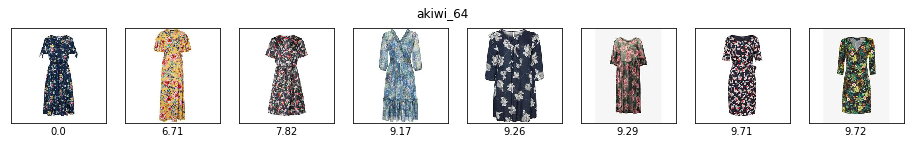

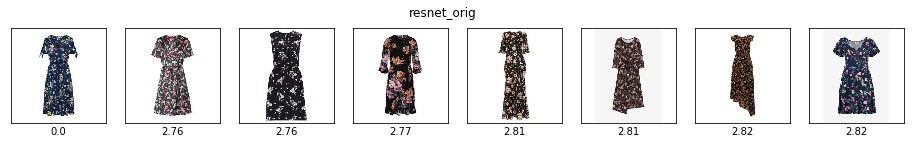

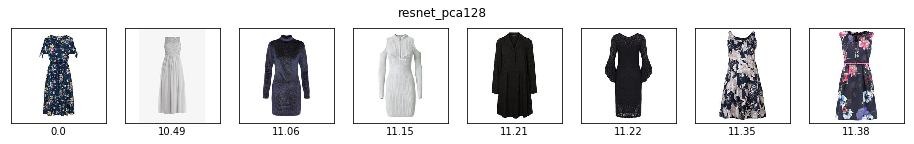

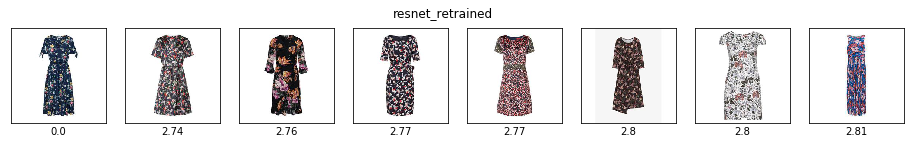

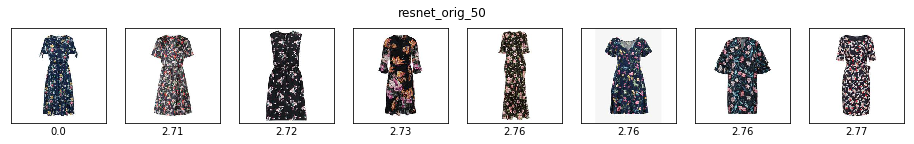

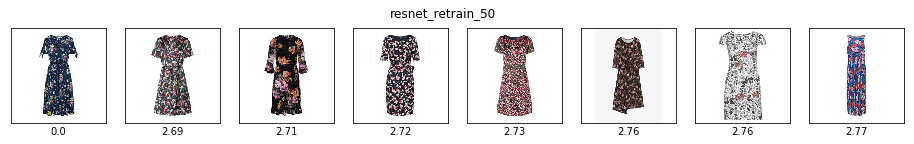

In [13]:
img_path = './test_images/dresses_sample/GAP0115001000001.jpg'
for key, features in feat_dict.items():
    get_similar_imgs(img_path, filelist, features, title=key)

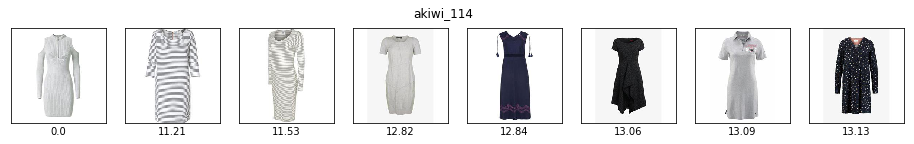

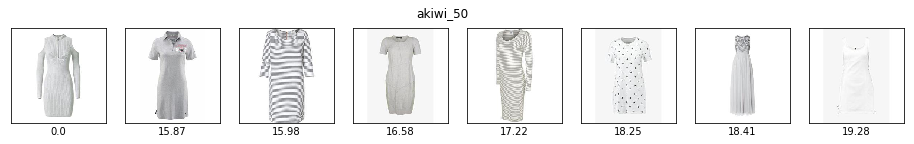

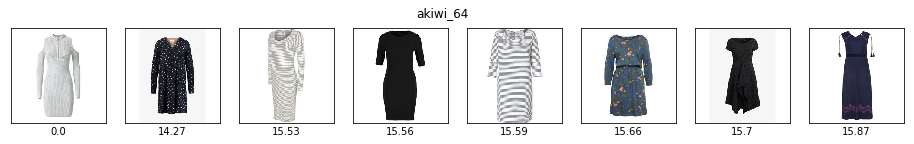

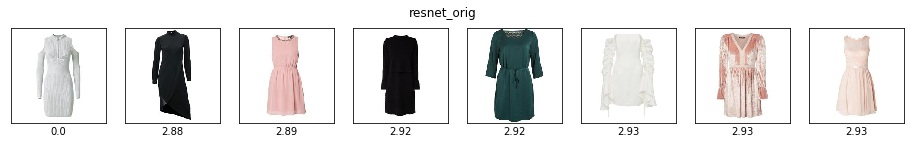

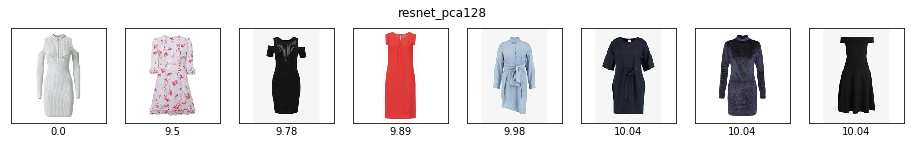

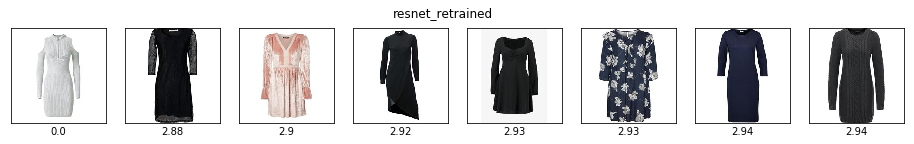

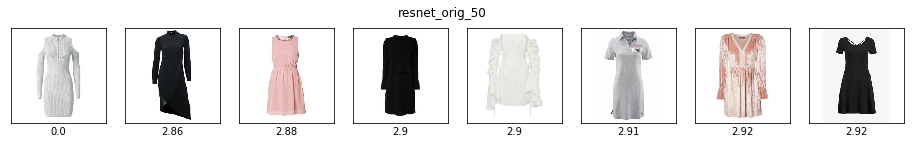

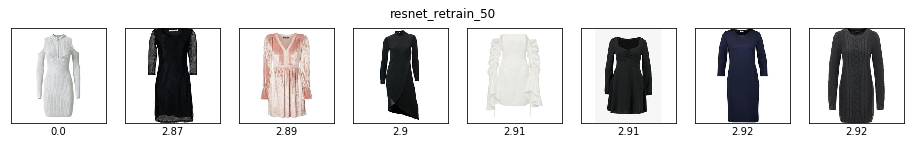

In [12]:
img_path = './test_images/dresses_sample/13718630.jpg'
for key, features in feat_dict.items():
    get_similar_imgs(img_path, filelist, features, title=key)